In [1]:
# Note: adding datasets folder to 'My Drive' is required!
# This defines file paths
ROOT = 'datasets'
FAKE_OR_REAL = ROOT + '/fake_or_real_news/fake_or_real_news.csv'
LIAR_LIAR_TRAIN = ROOT + '/liar/train.tsv'
LIAR_LIAR_TEST = ROOT + '/liar/test.tsv'

In [2]:
# Import libraries
import nltk
import pandas as pd
import numpy as np
import math
import sklearn
import matplotlib
import matplotlib.pyplot as plt

In [3]:
# Setup matplotlib
%matplotlib inline

# 3. Datasets

## 3.1 'Liar Liar' dataset

In [4]:
# Import 'Liar Liar' dataset
# Note: the dataset has already been splitted in train and test dataset
liar_ds_train = pd.read_csv(LIAR_LIAR_TRAIN, delimiter='\t', header=None)
liar_ds_test = pd.read_csv(LIAR_LIAR_TEST, delimiter='\t', header=None)

In [5]:
# Train dataset
liar_ds_train = liar_ds_train.loc[liar_ds_train[1].isin(['true', 'false']), 1:2]
# Test dataset
liar_ds_test = liar_ds_test.loc[liar_ds_test[1].isin(['true', 'false']), 1:2]

In [6]:
# Check train dataset
liar_ds_train.head()

,1,2
0,false,Says the Annies List political group supports ...
3,false,Health care reform legislation is likely to ma...
5,true,The Chicago Bears have had more starting quart...
12,false,When Mitt Romney was governor of Massachusetts...
16,true,McCain opposed a requirement that the governme...


In [7]:
# Define X (inputctext ) and Y (label) variables for each dataset

# Train dataset
X_train_liar = liar_ds_train[2]
Y_train_liar = liar_ds_train[1]
# Test dataset
X_test_liar = liar_ds_test[2]
Y_test_liar = liar_ds_test[1]

In [8]:
# Describe training dataset
X_train_liar.describe()

count                                                  3671
unique                                                 3661
top       On changing the rules for filibusters on presi...
freq                                                      3
Name: 2, dtype: object

In [9]:
# Describe testing dataset
X_test_liar.describe()

count                                                   457
unique                                                  457
top       Its not true that since hes been the president...
freq                                                      1
Name: 2, dtype: object

In [10]:
# We noted that there are some repeated texts inside the train dataset (not unique ones)
# hence we drop those rows

# Find duplicated rows
duplicated = X_train_liar.duplicated()
duplicated = duplicated[duplicated == True].index

# Drop duplicated rows from X and Y
X_train_liar.drop(duplicated, inplace = True)
Y_train_liar.drop(duplicated, inplace = True)

# Describe training dataset
X_train_liar.describe()

count                                                  3661
unique                                                 3661
top       The governor having a meeting ... isnt covered...
freq                                                      1
Name: 2, dtype: object

In [11]:
# Labels values must be turned into 0|1 form 'false'|'true'
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder().fit(['false', 'true'])
# Encode labels
Y_train_liar = le.transform(Y_train_liar)
Y_test_liar = le.transform(Y_test_liar)

# Describe labels
Y_train_liar = pd.Series(Y_train_liar)
Y_test_liar = pd.Series(Y_test_liar)

## 3.2 'Fake or Real' dataset

In [12]:
# Import 'Fake or Real' dataset
fake_or_real_ds = pd.read_csv(FAKE_OR_REAL, delimiter=',', header=0)

In [13]:
# Show dataset
fake_or_real_ds.head()

,Unnamed: 0,title,text,label,title_vectors
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,[ 1.1533764e-02 4.2144405e-03 1.9692603e-02 ...
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,[ 0.11267698 0.02518966 -0.00212591 0.021095...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,[ 0.04253004 0.04300297 0.01848392 0.048672...
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,[ 0.10801624 0.11583211 0.02874823 0.061732...
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,[ 1.69016439e-02 7.13498285e-03 -7.81233795e-...


In [14]:
# Define X (input text) and Y (label) variables
X_fake_or_real = fake_or_real_ds['text']
Y_fake_or_real = fake_or_real_ds['label']

In [15]:
# Describe the dataset
X_fake_or_real.describe()

count                                                  6335
unique                                                 6060
top       Killing Obama administration rules, dismantlin...
freq                                                     58
Name: text, dtype: object

In [16]:
# Find duplicate indexes
duplicated = X_fake_or_real.duplicated()
duplicated = duplicated[duplicated == True].index

# Remove duplicates
X_fake_or_real.drop(duplicated, inplace=True)
Y_fake_or_real.drop(duplicated, inplace=True)

In [17]:
# Find empty values
stripped = X_fake_or_real.copy().map(lambda x: x.replace(' ', ''))
stripped = stripped[stripped == ''].index

# Remove empty rows
X_fake_or_real.drop(stripped, inplace=True)
Y_fake_or_real.drop(stripped, inplace=True)

In [18]:
# Describe dataset
X_fake_or_real.describe()

count                                                  6059
unique                                                 6059
top       (CNN) Donald Trump on Wednesday refused to say...
freq                                                      1
Name: text, dtype: object

In [19]:
# Encode the label from 'FAKE'|'REAL' to 0|1
from sklearn.preprocessing import LabelEncoder

# Define Label Encoder instance
le = LabelEncoder().fit(['FAKE', 'REAL'])

# Transform Y
Y_fake_or_real = pd.Series(le.transform(Y_fake_or_real))

In [20]:
# Split dataset into training and testing
from sklearn.model_selection import train_test_split

X_train_fake_or_real, X_test_fake_or_real, Y_train_fake_or_real, Y_test_fake_or_real = train_test_split(
    X_fake_or_real, Y_fake_or_real, test_size = 0.2, random_state = 0
)

<BarContainer object of 2 artists>

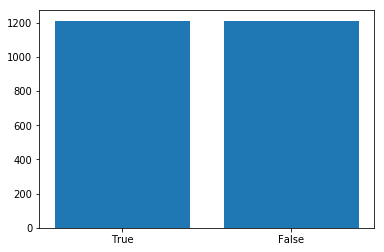

In [21]:
# Show test dataset Y labels distribution
plt.bar(['True', 'False'], [len(Y_test_fake_or_real == True), len(Y_test_fake_or_real == False)])

## 3.3 Datasets balancing

### 3.3.1 Liar Liar dataset

Text(0.5,1,'Liar Liar dataset: partitioning')

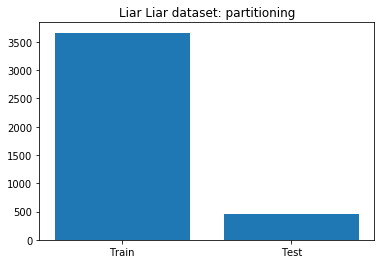

In [22]:
plt.bar(['Train', 'Test'], [len(Y_train_liar), len(Y_test_liar)])
plt.title('Liar Liar dataset: partitioning')

Text(0.5,1,'Liar Liar dataset: training partitioning')

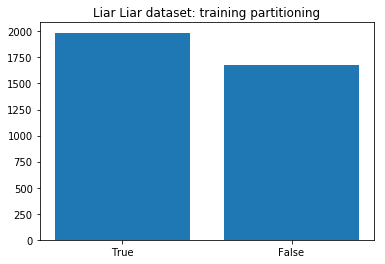

In [23]:
plt.bar(['True', 'False'], [len(Y_train_liar[Y_train_liar == 0]), len(Y_train_liar[Y_train_liar == 1])])
plt.title('Liar Liar dataset: training partitioning')

Text(0.5,1,'Liar Liar dataset: testing partitioning')

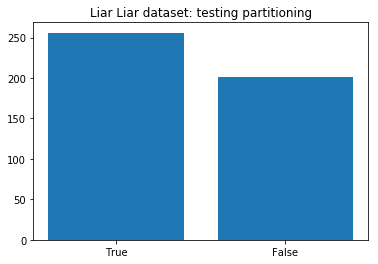

In [24]:
plt.bar(['True', 'False'], [len(Y_test_liar[Y_train_liar == 0]), len(Y_test_liar[Y_train_liar == 1])])
plt.title('Liar Liar dataset: testing partitioning')

### 3.3.2 Fake Or Real dataset

Text(0.5,1,'Fake Or Real dataset: partitioning')

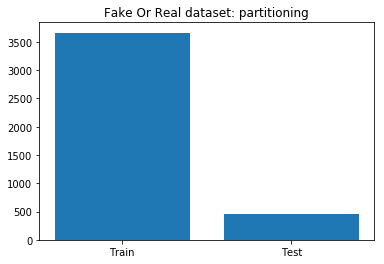

In [25]:
plt.bar(['Train', 'Test'], [len(Y_train_liar), len(Y_test_liar)])
plt.title('Fake Or Real dataset: partitioning')

Text(0.5,1,'Fake Or Real dataset: training partitioning')

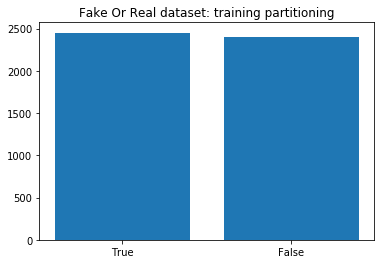

In [26]:
plt.bar(['True', 'False'], [len(Y_train_fake_or_real[Y_train_fake_or_real == 0]), len(Y_train_fake_or_real[Y_train_fake_or_real == 1])])
plt.title('Fake Or Real dataset: training partitioning')

Text(0.5,1,'Fake Or Real dataset: testing partitioning')

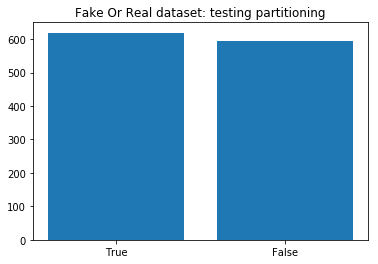

In [27]:
plt.bar(['True', 'False'], [len(Y_test_fake_or_real[Y_test_fake_or_real == 0]), len(Y_test_fake_or_real[Y_test_fake_or_real == 1])])
plt.title('Fake Or Real dataset: testing partitioning')

# 4. Features

## 4.1 Feature extraction

### 4.1.1 Bag Of Words (BOW)

In [28]:
# Import CountVectorizer: an object which handles BOW automatically
from sklearn.feature_extraction.text import CountVectorizer

In [29]:
# Get few rows of liar dataset (just to show bag of words)
X_train = X_train_liar[0:2].copy()
Y_train = Y_train_liar[0:2].copy()

In [30]:
# Compute BOW
cv = CountVectorizer().fit(X_train, Y_train)
# Show first row before transformation
print('Original string: "{}"'.format(X_train[0]))
# Vectorize rows
X_train = cv.transform(X_train)
# Show first row vectorized
X_train_array = X_train.toarray()
print('Becomes vector:\n{}'.format(X_train_array[0, :]))
print('of words:\n{}'.format(cv.get_feature_names()))

Original string: "Says the Annies List political group supports third-trimester abortions on demand."
Becomes vector:
[1 1 0 0 1 0 1 0 0 0 0 1 0 1 1 0 1 0 1 0 1 1 0 1]
of words:
['abortions', 'annies', 'care', 'change', 'demand', 'free', 'group', 'health', 'is', 'legislation', 'likely', 'list', 'mandate', 'on', 'political', 'reform', 'says', 'sex', 'supports', 'surgeries', 'the', 'third', 'to', 'trimester']


### 4.1.2 TF-IDF

In [31]:
# Using the example above, TF-IDF matrix is computed using TfidfTransformer
# It is an object which computes automatically the weighting of a BOW matrix
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer

In [32]:
# Compute tfidf matrix
tfidf = TfidfTransformer().fit(X_train, Y_train)
# Show BOW matrix before transformation
print('Original Bag Of Words natrix:\n{}'.format(X_train.toarray()))
# Transform BOW in TFIDF
X_train = tfidf.transform(X_train)
# Show TFIDF matrix after transformation
print('TF-IDF transformed matrix:\n{}'.format(X_train.toarray()))

Original Bag Of Words natrix:
[[1 1 0 0 1 0 1 0 0 0 0 1 0 1 1 0 1 0 1 0 1 1 0 1]
 [0 0 1 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 0]]
TF-IDF transformed matrix:
[[0.28867513 0.28867513 0.         0.         0.28867513 0.
  0.28867513 0.         0.         0.         0.         0.28867513
  0.         0.28867513 0.28867513 0.         0.28867513 0.
  0.28867513 0.         0.28867513 0.28867513 0.         0.28867513]
 [0.         0.         0.28867513 0.28867513 0.         0.28867513
  0.         0.28867513 0.28867513 0.28867513 0.28867513 0.
  0.28867513 0.         0.         0.28867513 0.         0.28867513
  0.         0.28867513 0.         0.         0.28867513 0.        ]]


### 4.1.3 Syntactical features

In this chapter we investigate the correlation between syntactical features and deception. The extraction of those syntactical features have been accomplished throught Part Of Speech tagging and chunking, which give a good insight about how a text, in this case a news text, either fake or real, is composed under the grammatical point of view.

**Part of Speech tagging**

With Part Of Speech tagging we refer to the process which, starting from a plain text sentence, associates to every word and every punctuation sign the corresponding Part Of Speech. In this way it is possible to find out, for example, how many verbs are present in a sentence. However, it does not provide more in depth analysis of the sentence like which grammatical structures are involved in a text and which in another.

**Part Of Speech chunking**

Part Of Speech chunking refers to the process which, given a sentence previously POS-tagged and a grammar, namely a set of rules which connect different POS tags with each other, retrieves a tree in which previously found tags are related by some other nodes. Those nodes are the relations nodes computed by following the grammar rules.

Moreover, this kind of feature has fewer dimension with respect to other high-dimensional features like BOW, which makes it suitable to be used as input for machine learning model such as trees.

**Development**

Developing a chunked sentence tree involves different processing steps. In each of those, Natural Language Toolkit (Nltk) library has been used: it provides some useful functionality for dealing with human language processing.

1. Word tokenization
To tokenize a sentence means to create an array of words retrieved by splitting the sentence into words and punctuation elements. Nltk allows to do this just by invoking the <code>word_tokenize()</code> function.
2. Word tagging
Tagging is a much more complicated step. In fact, it involves machine learning traning and testing of a model which is responsible of providing a coherent tag for every word in the tokenized array. However, all those computation are provided by nltk throught the <code>pos_tag()</code> function. Even if all the computations for pos tagging are done "under the hood", the user must be aware that tagging a tokenized sentence colud be resource and time consuming.
3. Sentence chunking
To chunk a sentence means to organize its tagged tokens into a tree, which express relations between nodes. Relations are, themselves, nodes which have POS tags or other relations as child nodes. Relations are defined by one or more grammar rules. Nltk provides the object <code>RegexParser()</code> which, given a grammar in the form of a regular expression and a list of tokenized and tagged words, automatically produces a tree. The tree must be later traversed to extract relations information from it.

The rules defined inside the grammar that we used and investigated are the above ones:
1. NP (Noun Phrase) is a sequence of determiner, adjective and a noun
2. PP (Preposition Phrase) is a noun phrase preceded by a preposition
3. VP (Verb Phrase) is a sequence made by a verb and its arguments
4. CLAUSE is a sequence of a noun phrase and a predicate

**Liar Liar dataset**

Liar Liar dataset contains short sentences. For this reason it would be expectable to detect a low number of POS chunks. However, we expect also some kind of "polarization" of POS chunks, in the sense that for each row in the dataset we will expect to have, or not, a specific POS chunk, instead of having many but different in count.

**Fake Or Real dataset**

Since Fake Or Real dataset contians more long and detailed text news, it is expected to count a higher number of either POS chunks and POS tags with respect to Liar Liar dataset. Differently from this last one, it could be the difference count in POS tags/chunks wich matters, rather than the presence, or not, of a specific POS tag/chunk.

In [33]:
# Get few rows of liar dataset (just to show bag of words)
X_train = X_train_liar[0:2].copy()
Y_train = Y_train_liar[0:2].copy()

In [34]:
# Download nltk resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [35]:
# Define a function which tags each word with the respective POS tag
# Word and tag will be saparated by a slash (/) symbol
def word_pos_tokenizer(sentence):
    # Splits the sentence in tokens (words)
    tokenized = nltk.word_tokenize(sentence)
    # Merges the original word with the POS tag
    # Words are lowered
    tokenized = ['/'.join((word.lower(), tag)) for word, tag in nltk.pos_tag(tokenized)]
    # Returns tokenized '<word>/<POS tag>' list
    return tokenized

In [36]:
# The function defined above can be passed as argument to CountVectorizer
cv = CountVectorizer(tokenizer=word_pos_tokenizer).fit(X_train, Y_train)
X_train_pos = cv.fit_transform(X_train)

# Print results
print("Tagged features:\n{}".format(cv.get_feature_names()))
print()
print("Vectorized string:\n{}".format(X_train_pos.toarray()))

Tagged features:
['./.', 'abortions/NNS', 'annies/NNS', 'care/NN', 'change/NN', 'demand/NN', 'free/JJ', 'group/NN', 'health/NN', 'is/VBZ', 'legislation/NN', 'likely/JJ', 'list/VBP', 'mandate/VB', 'on/IN', 'political/JJ', 'reform/NN', 'says/VBZ', 'sex/NN', 'supports/VBZ', 'surgeries/NNS', 'the/DT', 'third-trimester/NN', 'to/TO']

Vectorized string:
[[1 1 1 0 0 1 0 1 0 0 0 0 1 0 1 1 0 1 0 1 0 1 1 0]
 [1 0 0 1 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1]]


In [37]:
import string

# Define function which extracts only POS tags
def pos_tokenizer(sentence):
    # Tokenize
    tokenized = nltk.word_tokenize(sentence)
    # Tagged 
    tagged_ = nltk.pos_tag(tokenized)
    # Retireve tag only
    tagged = [tag for word, tag in tagged_ if word not in set(string.punctuation)]
    # Retrieve tag for punctuation
    tagged += ['PUNCT' for word, tag in tagged_ if word in set(string.punctuation)]
    # Return tagged sentence
    return tagged

In [38]:
# The function defined above can be passed as argument to CountVectorizer
cv = CountVectorizer(tokenizer=pos_tokenizer).fit(X_train, Y_train)
X_train_pos = cv.fit_transform(X_train)

# Print results
print("Tagged features:\n{}".format(cv.get_feature_names()))
print()
print("Vectorized string:\n{}".format(X_train_pos.toarray()))

Tagged features:
['DT', 'IN', 'JJ', 'NN', 'NNS', 'PUNCT', 'TO', 'VB', 'VBP', 'VBZ']

Vectorized string:
[[1 1 1 3 2 1 0 0 1 2]
 [0 0 2 6 1 1 1 1 0 1]]


In [39]:
import string
from nltk import RegexpParser

# Define a function used for chunk tokenization
def chunk_tokenizer(sentence):
    # Tokenize the sentence
    tokenized = nltk.word_tokenize(sentence)
    # Tag the sentence
    tagged = nltk.pos_tag(tokenized)
    # Define a grammar
    grammar = r"""
        NP: {<DT|JJ|NN.*>+}          # Chunk sequences of DT, JJ, NN
        PP: {<IN><NP>}               # Chunk prepositions followed by NP
        VP: {<VB.*><NP|PP|CLAUSE>+$} # Chunk verbs and their arguments
        CLAUSE: {<NP><VP>}           # Chunk NP, VP
    """
    # Uses a RegexParser to chunk the sentence accordingly to the grammar
    chunked = RegexpParser(grammar, loop=2).parse(tagged)
    # Count NP, PP, VP and CLAUSE
    tags = chunk_traverse(chunked)
    # Return list of tags
    return tags

# Extracts tags from tree
def chunk_traverse(node):
    # Case it is a leaf
    try:
        node.label()
    # Return node's content
    except AttributeError:
        # Return the joined node
        if node[1] in set(string.punctuation):
            return ['PUNCT', node[1]]
        else:
            # Define pos tag
            pos = node[1]
            # Define group for POS tag (takes first two chars)
            gpos = pos[:2]
            # Return both
            return [pos, gpos]
    # Case it is a common node
    else:
        # Define a tag container, containing only node label
        tags = [node.label()]
        # Extracts tags from every child node
        for child in node:
            tags += chunk_traverse(child)
        # Return a list of tags
        return tags

In [40]:
# Example on 'Liar Liar' dataset
sentence = X_train_liar[0]
print("Original sentence: '{}'".format(sentence))
print()
print("Tokenized sentence: {}".format(chunk_tokenizer(sentence)))

Original sentence: 'Says the Annies List political group supports third-trimester abortions on demand.'

Tokenized sentence: ['S', 'VBZ', 'VB', 'NP', 'DT', 'DT', 'NNPS', 'NN', 'NNP', 'NN', 'JJ', 'JJ', 'NN', 'NN', 'VBZ', 'VB', 'NP', 'NN', 'NN', 'NNS', 'NN', 'PP', 'IN', 'IN', 'NP', 'NN', 'NN', 'PUNCT', '.']


#### 4.1.3.1 Liar Liar dataset analysis

There syntactical features are computed on Liar Liar dataset. Then, computed features are inserted into a Pandas DataFrame, here called "summary", which helps to visualize them and develop some statistical conclusion.

We are interested expecially in three metrics:
1. Mean count of POS tags/chunks per news text
2. Variance of counted POS tags/chunks per news text
3. Chi-2 score (and relative P-Value) of every POS tag/chunk 

Summary shows that, generally, those features which are reported to be the best in term of P-Value score (with lower P-Value score), have higher mean and variance, while still it is not a strict constraint.

Isolated features, e.g. Part Of Speech, which are correlated with the label are a half of all Part of Speech detected.

In [0]:
# Use LL dataset for feature analisys
X_train, Y_train = X_train_liar.copy(), Y_train_liar.copy()

In [0]:
# Vectorize the whole training dataset using chunk_tokenizer
cv = CountVectorizer(tokenizer=chunk_tokenizer).fit(X_train, Y_train)

X_train = cv.transform(X_train)

In [0]:
# Compute the mean count for every column (POS tag/chunk)
X_mean = X_train.toarray().mean(0)

X_mean

array([1.11409119e-01, 8.27728492e-01, 7.15617908e+00, 2.15164019e+00,
       2.19867960e+00, 4.22191046e+01, 3.51219311e+01, 4.85001032e+00,
       5.30208376e+01, 2.74970085e+01, 9.69671962e-03, 1.65922839e+02,
       3.06498865e+00, 1.21188364e+00, 2.05024551e+02, 1.74414071e+02,
       2.72580978e+00, 1.84547143e+00, 8.25252734e-04, 1.99566742e+01,
       4.36302043e+02, 9.63688880e+00, 2.05075304e-01, 5.47786260e+01,
       2.23014029e+02, 6.43697132e-01, 6.43697132e-01, 2.51763978e+00,
       2.51763978e+00, 7.46304931e+01, 3.99174747e+01, 2.83146276e+01,
       1.16028471e+01, 8.74805034e+01, 7.50249639e+01, 1.55580772e+00,
       5.95626161e-01, 6.48978750e+00, 1.00000000e+00, 1.87744997e-02,
       1.87744997e-02, 4.58184444e+01, 3.28863214e-01, 1.80556839e+02,
       2.98134929e+01, 1.87910047e+01, 1.96998143e+01, 2.03356715e+01,
       2.46253353e+01, 3.96121312e-02, 4.66618527e+00, 4.66618527e+00,
       1.01112028e+01, 1.53290695e-01, 3.79884465e+00, 3.79884465e+00,
      

In [0]:
# Compute the variance for every column (POS tag/chunk)
X_sd = X_train.toarray().std(0)

X_sd

array([9.55135433e-01, 4.75214334e+00, 1.51056575e+01, 5.58682512e+00,
       5.67610884e+00, 4.79240194e+01, 4.44380518e+01, 1.18561103e+01,
       6.49204317e+01, 3.81651848e+01, 1.06081095e-01, 1.89918041e+02,
       5.64521755e+00, 3.42388712e+00, 2.28240527e+02, 1.95039980e+02,
       4.08812057e+00, 2.81025187e+00, 4.06180308e-02, 2.68459869e+01,
       4.66254275e+02, 1.52371185e+01, 6.70359696e-01, 6.09730185e+01,
       2.43420704e+02, 1.28870167e+00, 1.28870167e+00, 5.46029126e+00,
       5.46029126e+00, 8.29787846e+01, 5.30030128e+01, 3.96563773e+01,
       1.48073418e+01, 1.02935603e+02, 9.52745611e+01, 2.42445819e+00,
       1.14957561e+00, 9.06726172e+00, 0.00000000e+00, 1.76673244e-01,
       1.76673244e-01, 5.12627914e+01, 1.37409437e+00, 2.04969788e+02,
       3.66075981e+01, 1.98046957e+01, 2.22887082e+01, 3.03173806e+01,
       2.99586112e+01, 2.04344434e-01, 5.93562689e+00, 5.93562689e+00,
       1.38323621e+01, 4.75325785e-01, 5.67696662e+00, 5.67696662e+00,
      

In [0]:
# Sort features from best to worst accordingly with the chi2 function score

# Import resources
from sklearn.feature_selection import chi2

# Compute chi2 (Return row vector (pvalue, chi2))
X_chi2 = chi2(X_train, Y_train)
X_pval = X_chi2[1] # Pvalue is the second element of the returned tuple
X_chi2 = X_chi2[0] # Chi2 is the first element of the returned tuple

In [0]:
# Create a dataframe for data summarization
summary = pd.DataFrame(
    data = [X_mean, X_sd, X_chi2, X_pval],
    columns = cv.get_feature_names(),
    index = ['mean', 'sd', 'chi2', 'pvalue']
)

summary

,#,$,'',(,),",",.,:,CC,CD,...,VBP,VBZ,VP,WD,WDT,WP,WP$,WR,WRB,``
mean,1.114091e-01,0.827728,7.156179,2.151640e+00,2.198680e+00,42.219105,35.121931,4.850010,53.020838,2.749701e+01,...,2.033567e+01,24.625335,3.961213e-02,4.666185e+00,4.666185e+00,10.111203,0.153291,3.798845e+00,3.798845e+00,6.564885
sd,9.551354e-01,4.752143,15.105658,5.586825e+00,5.676109e+00,47.924019,44.438052,11.856110,64.920432,3.816518e+01,...,3.031738e+01,29.958611,2.043444e-01,5.935627e+00,5.935627e+00,13.832362,0.475326,5.676967e+00,5.676967e+00,13.744233
chi2,1.824604e+02,0.231516,17261.720767,2.760596e+02,3.074772e+02,4977.179607,4032.097748,0.369941,3155.722039,1.113675e+03,...,4.669035e+02,1777.645640,9.894357e+01,3.280352e+02,3.280352e+02,2041.159885,21.858342,2.633546e+02,2.633546e+02,17376.982889
pvalue,1.406787e-41,0.630402,0.000000,5.423852e-62,7.741067e-69,0.000000,0.000000,0.543036,0.000000,3.520996e-244,...,1.512116e-103,0.000000,2.597999e-23,2.574758e-73,2.574758e-73,0.000000,0.000003,3.186455e-59,3.186455e-59,0.000000


In [0]:
# Sorting the array to find the best pvalue
summary = summary.sort_values(by='chi2', axis=1, ascending=False)

summary

,NN,NP,IN,VB,``,'',DT,VBD,JJ,PUNCT,...,SYM,SY,FW,LS,PDT,PD,:,$,UH,S
mean,436.302043,223.014029,205.024551,180.556839,6.564885,7.156179,165.922839,29.813493,174.414071,87.480503,...,0.018774,0.018774,1.211884,0.000825,0.643697,0.643697,4.850010,0.827728,0.328863,1.0
sd,466.254275,243.420704,228.240527,204.969788,13.744233,15.105658,189.918041,36.607598,195.039980,102.935603,...,0.176673,0.176673,3.423887,0.040618,1.288702,1.288702,11.856110,4.752143,1.374094,0.0
chi2,39380.551997,21027.194405,19353.936563,18187.308628,17376.982889,17261.720767,14385.597265,11225.715022,10537.132403,6920.157569,...,8.596443,8.596443,6.497298,3.910241,3.296142,3.296142,0.369941,0.231516,0.039282,0.0
pvalue,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.003368,0.003368,0.010804,0.047993,0.069443,0.069443,0.543036,0.630402,0.842890,1.0


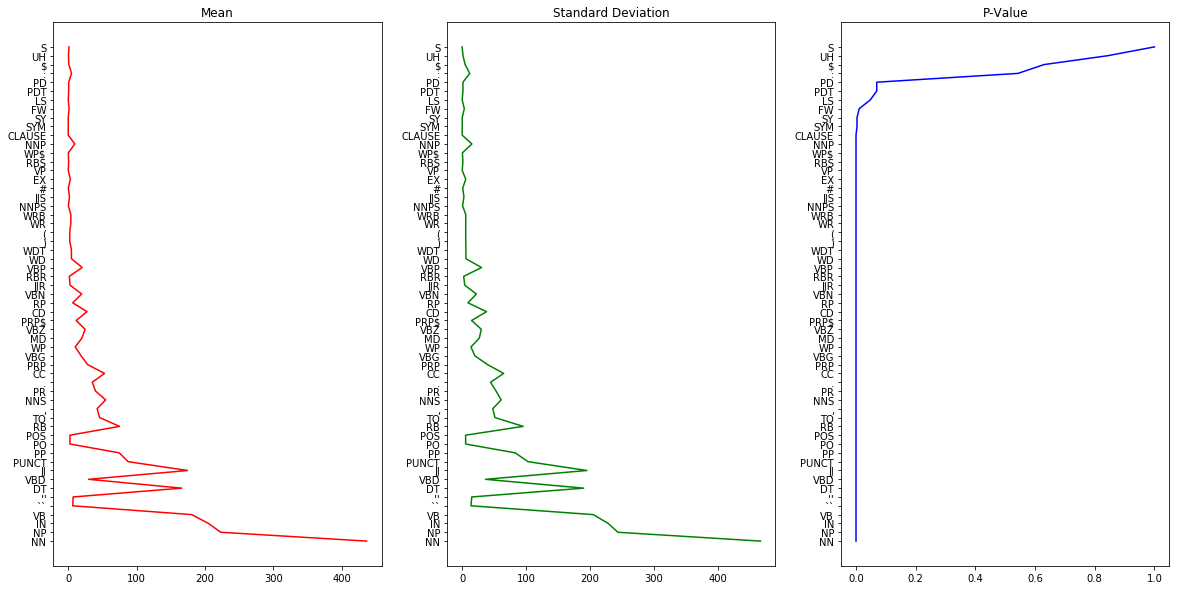

In [0]:
# Import preprocessing library from sklearn
from sklearn.preprocessing import scale

# Scales the values
mean = summary.loc['mean']
sd = summary.loc['sd']
pvalue = summary.loc['pvalue']

# Set figure size
plt.figure(figsize=(20,10))

# Plot mean
plt.subplot(131)
plt.plot(mean, summary.columns, 'r-')
plt.title('Mean')

# Plot variance
plt.subplot(132)
plt.plot(sd, summary.columns, 'g-')
plt.title('Standard Deviation')

# Plot pvalue
plt.subplot(133)
plt.plot(pvalue, summary.columns, 'b-', label='P-Value')
plt.title('P-Value')

# Plot figure
plt.show()

In [0]:
# Extract the best chunks: the ones with p-value lower than 0.05
# Note the number of POS tags is now reduced from 45 to 25
summary.loc[:, summary.loc['pvalue', :] < 0.05]

,CD,IN,JJR,DT,PP,NP,JJ,VBP,FW,TO,...,NNS,VBG,NNPS,RBR,",",:,PUNCT,VBN,PRP,UH
mean,1.479377e+00,4.598197e+00,1.166348e-01,3.215515e+00,1.604480e+00,4.768096,3.172357,0.426113,0.007102,0.842393,...,1.435946,0.315214,0.004917,0.030320,0.468451,0.067468,1.931713,0.444414,0.377766,0.001639
var,1.022991e+01,1.138212e+01,1.248831e-01,8.029216e+00,1.760526e+00,7.732345,10.611375,0.499662,0.014153,1.871090,...,1.740024,0.346966,0.004893,0.032132,0.807322,0.082036,2.153763,0.489467,0.584690,0.003275
chi2,1.152144e+02,8.293268e+01,4.079942e+01,2.823902e+01,2.801879e+01,20.390112,20.063203,18.524732,15.845255,14.726476,...,10.000811,9.321794,8.690099,8.436822,8.405579,7.937981,7.059857,6.709861,5.543725,5.054857
pvalue,7.063347e-27,8.489604e-20,1.686832e-10,1.072209e-07,1.201431e-07,0.000006,0.000007,0.000017,0.000069,0.000124,...,0.001565,0.002264,0.003199,0.003677,0.003741,0.004841,0.007883,0.009588,0.018547,0.024557


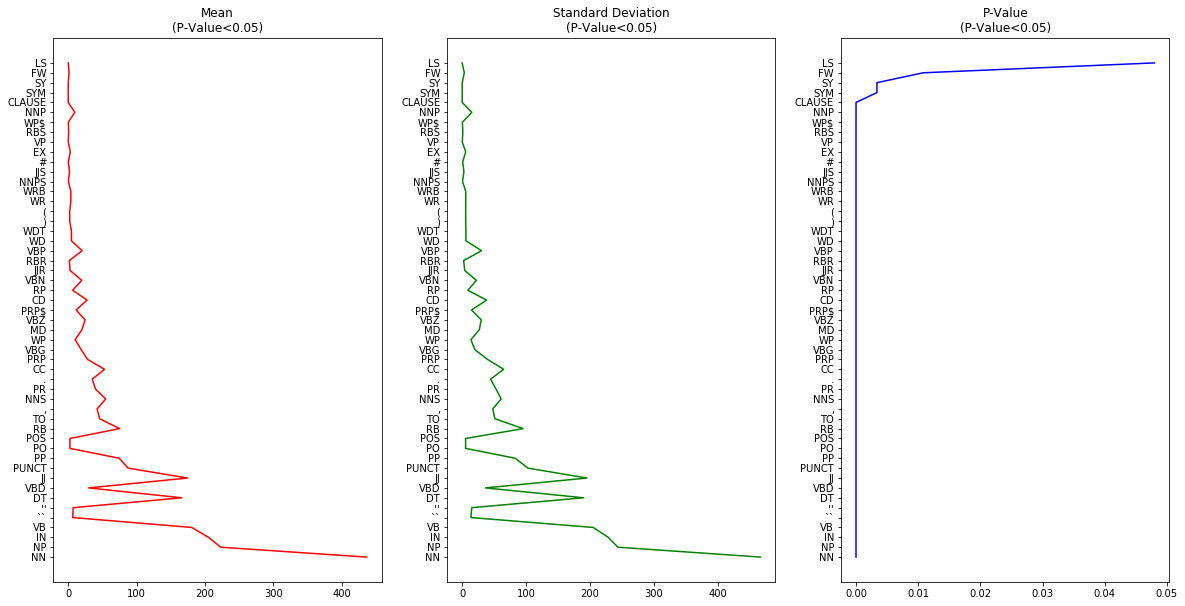

In [0]:
# Import preprocessing library from sklearn
from sklearn.preprocessing import scale

# Retrieve only values with pvalue lower than 0.05
summary_ = summary.loc[:, summary.loc['pvalue', :] < 0.05]

# Scales the values
mean = summary_.loc['mean']
sd = summary_.loc['sd']
pvalue = summary_.loc['pvalue']

# Set figure size
plt.figure(figsize=(20,10))

# Plot mean
plt.subplot(131)
plt.plot(mean, summary_.columns, 'r-')
plt.title('Mean\n(P-Value<0.05)')

# Plot variance
plt.subplot(132)
plt.plot(sd, summary_.columns, 'g-')
plt.title('Standard Deviation\n(P-Value<0.05)')

# Plot pvalue
plt.subplot(133)
plt.plot(pvalue, summary_.columns, 'b-')
plt.title('P-Value\n(P-Value<0.05)')

# Plot figure
plt.show()

In [0]:
# Extract the worst chunks: the ones with p-value higher than 0.05
summary.loc[:, summary.loc['pvalue', :] >= 0.05]

,PDT,PD,:,$,UH,S
mean,0.643697,0.643697,4.850010,0.827728,0.328863,1.0
sd,1.288702,1.288702,11.856110,4.752143,1.374094,0.0
chi2,3.296142,3.296142,0.369941,0.231516,0.039282,0.0
pvalue,0.069443,0.069443,0.543036,0.630402,0.842890,1.0


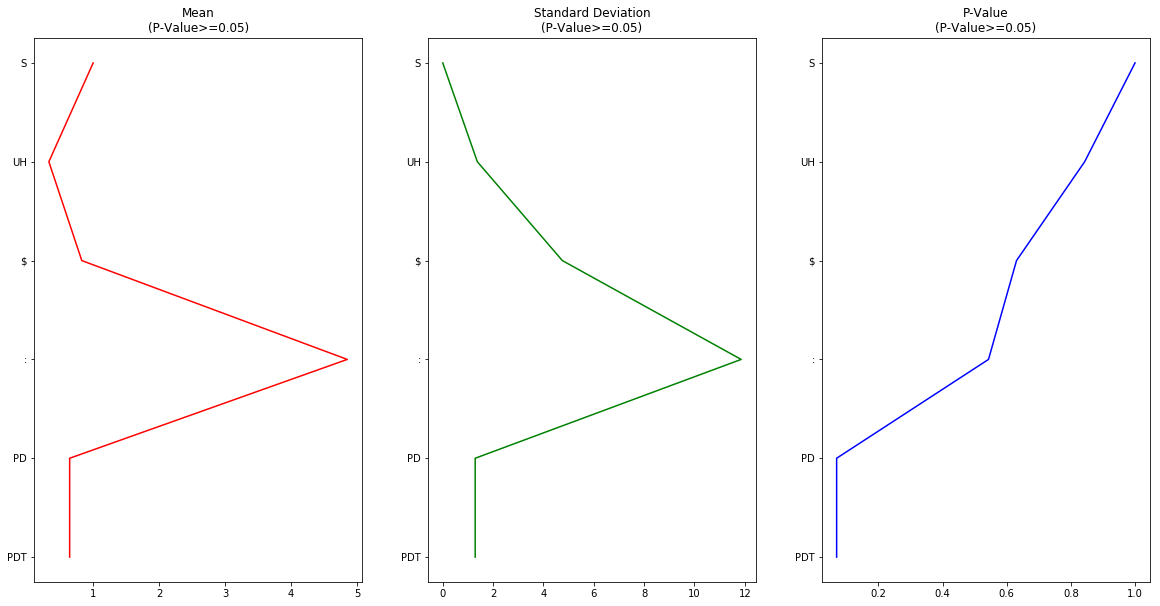

In [0]:
# Import preprocessing library from sklearn
from sklearn.preprocessing import scale

# Retrieve only values with pvalue lower than 0.05
summary_ = summary.loc[:, summary.loc['pvalue', :] >= 0.05]

# Scales the values
mean = summary_.loc['mean']
sd = summary_.loc['sd']
pvalue = summary_.loc['pvalue']

# Set figure size
plt.figure(figsize=(20,10))

# Plot mean
plt.subplot(131)
plt.plot(mean, summary_.columns, 'r-')
plt.title('Mean\n(P-Value>=0.05)')

# Plot variance
plt.subplot(132)
plt.plot(sd, summary_.columns, 'g-')
plt.title('Standard Deviation\n(P-Value>=0.05)')

# Plot pvalue
plt.subplot(133)
plt.plot(pvalue, summary_.columns, 'b-')
plt.title('P-Value\n(P-Value>=0.05)')

# Plot figure
plt.show()

#### 4.1.3.2 Fake Or Real Dataset analisys



In [0]:
# Use LL dataset for feature analisys
X_train, Y_train = X_train_fake_or_real.copy(), Y_train_fake_or_real.copy()

In [0]:
# Vectorize the whole training dataset using chunk_tokenizer
cv = CountVectorizer(tokenizer=chunk_tokenizer).fit(X_train, Y_train)

X_train = cv.transform(X_train)

In [0]:
# Compute the mean count for every column (POS tag/chunk)
X_mean = X_train.toarray().mean(0)

X_mean

array([1.11409119e-01, 8.27728492e-01, 7.15617908e+00, 2.15164019e+00,
       2.19867960e+00, 4.22191046e+01, 3.51219311e+01, 4.85001032e+00,
       5.30208376e+01, 2.74970085e+01, 9.69671962e-03, 1.65922839e+02,
       3.06498865e+00, 1.21188364e+00, 2.05024551e+02, 1.74414071e+02,
       2.72580978e+00, 1.84547143e+00, 8.25252734e-04, 1.99566742e+01,
       4.36302043e+02, 9.63688880e+00, 2.05075304e-01, 5.47786260e+01,
       2.23014029e+02, 6.43697132e-01, 6.43697132e-01, 2.51763978e+00,
       2.51763978e+00, 7.46304931e+01, 3.99174747e+01, 2.83146276e+01,
       1.16028471e+01, 8.74805034e+01, 7.50249639e+01, 1.55580772e+00,
       5.95626161e-01, 6.48978750e+00, 1.00000000e+00, 1.87744997e-02,
       1.87744997e-02, 4.58184444e+01, 3.28863214e-01, 1.80556839e+02,
       2.98134929e+01, 1.87910047e+01, 1.96998143e+01, 2.03356715e+01,
       2.46253353e+01, 3.96121312e-02, 4.66618527e+00, 4.66618527e+00,
       1.01112028e+01, 1.53290695e-01, 3.79884465e+00, 3.79884465e+00,
      

In [0]:
# Compute the variance for every column (POS tag/chunk)
X_sd = X_train.toarray().std(0)

X_sd

array([9.55135433e-01, 4.75214334e+00, 1.51056575e+01, 5.58682512e+00,
       5.67610884e+00, 4.79240194e+01, 4.44380518e+01, 1.18561103e+01,
       6.49204317e+01, 3.81651848e+01, 1.06081095e-01, 1.89918041e+02,
       5.64521755e+00, 3.42388712e+00, 2.28240527e+02, 1.95039980e+02,
       4.08812057e+00, 2.81025187e+00, 4.06180308e-02, 2.68459869e+01,
       4.66254275e+02, 1.52371185e+01, 6.70359696e-01, 6.09730185e+01,
       2.43420704e+02, 1.28870167e+00, 1.28870167e+00, 5.46029126e+00,
       5.46029126e+00, 8.29787846e+01, 5.30030128e+01, 3.96563773e+01,
       1.48073418e+01, 1.02935603e+02, 9.52745611e+01, 2.42445819e+00,
       1.14957561e+00, 9.06726172e+00, 0.00000000e+00, 1.76673244e-01,
       1.76673244e-01, 5.12627914e+01, 1.37409437e+00, 2.04969788e+02,
       3.66075981e+01, 1.98046957e+01, 2.22887082e+01, 3.03173806e+01,
       2.99586112e+01, 2.04344434e-01, 5.93562689e+00, 5.93562689e+00,
       1.38323621e+01, 4.75325785e-01, 5.67696662e+00, 5.67696662e+00,
      

In [0]:
# Sort features from best to worst accordingly with the chi2 function score

# Import resources
from sklearn.feature_selection import chi2

# Compute chi2 (Return row vector (pvalue, chi2))
X_chi2 = chi2(X_train, Y_train)
X_pval = X_chi2[1] # Pvalue is the second element of the returned tuple
X_chi2 = X_chi2[0] # Chi2 is the first element of the returned tuple

In [0]:
# Create a dataframe for data summarization
summary = pd.DataFrame(
    data = [X_mean, X_sd, X_chi2, X_pval],
    columns = cv.get_feature_names(),
    index = ['mean', 'sd', 'chi2', 'pvalue']
)

summary

,#,$,'',(,),",",.,:,CC,CD,...,VBP,VBZ,VP,WD,WDT,WP,WP$,WR,WRB,``
mean,1.114091e-01,0.827728,7.156179,2.151640e+00,2.198680e+00,42.219105,35.121931,4.850010,53.020838,2.749701e+01,...,2.033567e+01,24.625335,3.961213e-02,4.666185e+00,4.666185e+00,10.111203,0.153291,3.798845e+00,3.798845e+00,6.564885
sd,9.551354e-01,4.752143,15.105658,5.586825e+00,5.676109e+00,47.924019,44.438052,11.856110,64.920432,3.816518e+01,...,3.031738e+01,29.958611,2.043444e-01,5.935627e+00,5.935627e+00,13.832362,0.475326,5.676967e+00,5.676967e+00,13.744233
chi2,1.824604e+02,0.231516,17261.720767,2.760596e+02,3.074772e+02,4977.179607,4032.097748,0.369941,3155.722039,1.113675e+03,...,4.669035e+02,1777.645640,9.894357e+01,3.280352e+02,3.280352e+02,2041.159885,21.858342,2.633546e+02,2.633546e+02,17376.982889
pvalue,1.406787e-41,0.630402,0.000000,5.423852e-62,7.741067e-69,0.000000,0.000000,0.543036,0.000000,3.520996e-244,...,1.512116e-103,0.000000,2.597999e-23,2.574758e-73,2.574758e-73,0.000000,0.000003,3.186455e-59,3.186455e-59,0.000000


In [0]:
# Sorting the array to find the best pvalue
summary = summary.sort_values(by='chi2', axis=1, ascending=False)

summary

,NN,NP,IN,VB,``,'',DT,VBD,JJ,PUNCT,...,SYM,SY,FW,LS,PDT,PD,:,$,UH,S
mean,436.302043,223.014029,205.024551,180.556839,6.564885,7.156179,165.922839,29.813493,174.414071,87.480503,...,0.018774,0.018774,1.211884,0.000825,0.643697,0.643697,4.850010,0.827728,0.328863,1.0
sd,466.254275,243.420704,228.240527,204.969788,13.744233,15.105658,189.918041,36.607598,195.039980,102.935603,...,0.176673,0.176673,3.423887,0.040618,1.288702,1.288702,11.856110,4.752143,1.374094,0.0
chi2,39380.551997,21027.194405,19353.936563,18187.308628,17376.982889,17261.720767,14385.597265,11225.715022,10537.132403,6920.157569,...,8.596443,8.596443,6.497298,3.910241,3.296142,3.296142,0.369941,0.231516,0.039282,0.0
pvalue,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.003368,0.003368,0.010804,0.047993,0.069443,0.069443,0.543036,0.630402,0.842890,1.0


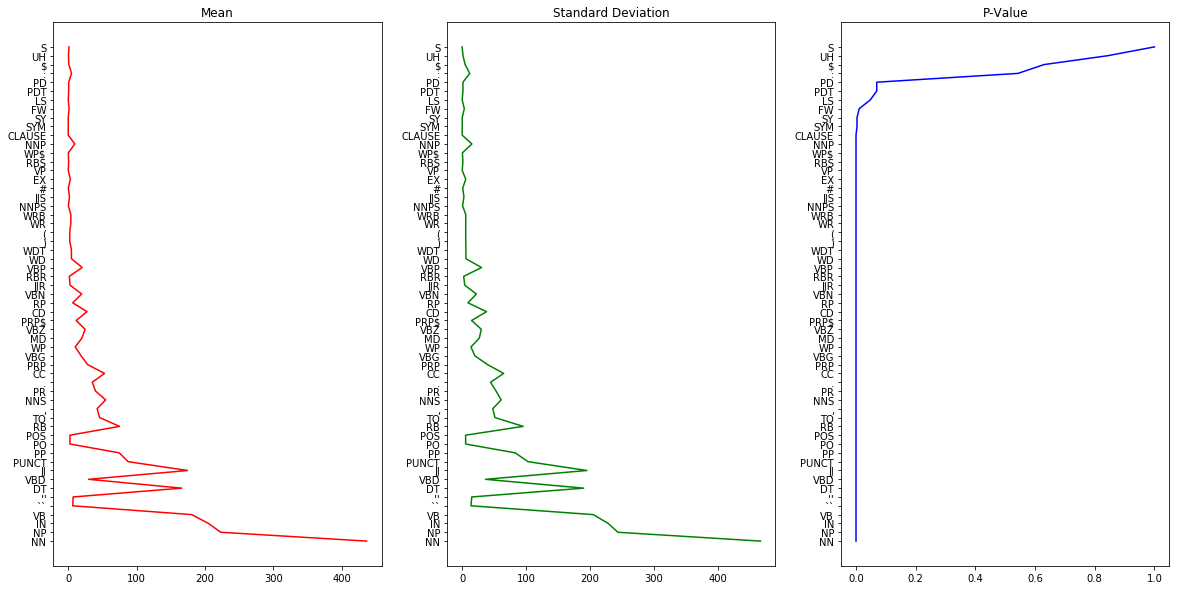

In [0]:

# Import preprocessing library from sklearn
from sklearn.preprocessing import scale

# Scales the values
mean = summary.loc['mean']
sd = summary.loc['sd']
pvalue = summary.loc['pvalue']

# Set figure size
plt.figure(figsize=(20,10))

# Plot mean
plt.subplot(131)
plt.plot(mean, summary.columns, 'r-')
plt.title('Mean')

# Plot variance
plt.subplot(132)
plt.plot(sd, summary.columns, 'g-')
plt.title('Standard Deviation')

# Plot pvalue
plt.subplot(133)
plt.plot(pvalue, summary.columns, 'b-', label='P-Value')
plt.title('P-Value')

# Plot figure
plt.show()

In [0]:
# Extract the best chunks: the ones with p-value lower than 0.05
summary.loc[:, summary.loc['pvalue', :] < 0.05]

,NN,NP,IN,VB,``,'',DT,VBD,JJ,PUNCT,...,EX,VP,RBS,WP$,NNP,CLAUSE,SYM,SY,FW,LS
mean,436.302043,223.014029,205.024551,180.556839,6.564885,7.156179,165.922839,29.813493,174.414071,87.480503,...,3.064989e+00,3.961213e-02,5.956262e-01,0.153291,9.636889,0.009697,0.018774,0.018774,1.211884,0.000825
sd,466.254275,243.420704,228.240527,204.969788,13.744233,15.105658,189.918041,36.607598,195.039980,102.935603,...,5.645218e+00,2.043444e-01,1.149576e+00,0.475326,15.237118,0.106081,0.176673,0.176673,3.423887,0.040618
chi2,39380.551997,21027.194405,19353.936563,18187.308628,17376.982889,17261.720767,14385.597265,11225.715022,10537.132403,6920.157569,...,1.631150e+02,9.894357e+01,8.931515e+01,21.858342,20.817345,19.751875,8.596443,8.596443,6.497298,3.910241
pvalue,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.361062e-37,2.597999e-23,3.366704e-21,0.000003,0.000005,0.000009,0.003368,0.003368,0.010804,0.047993


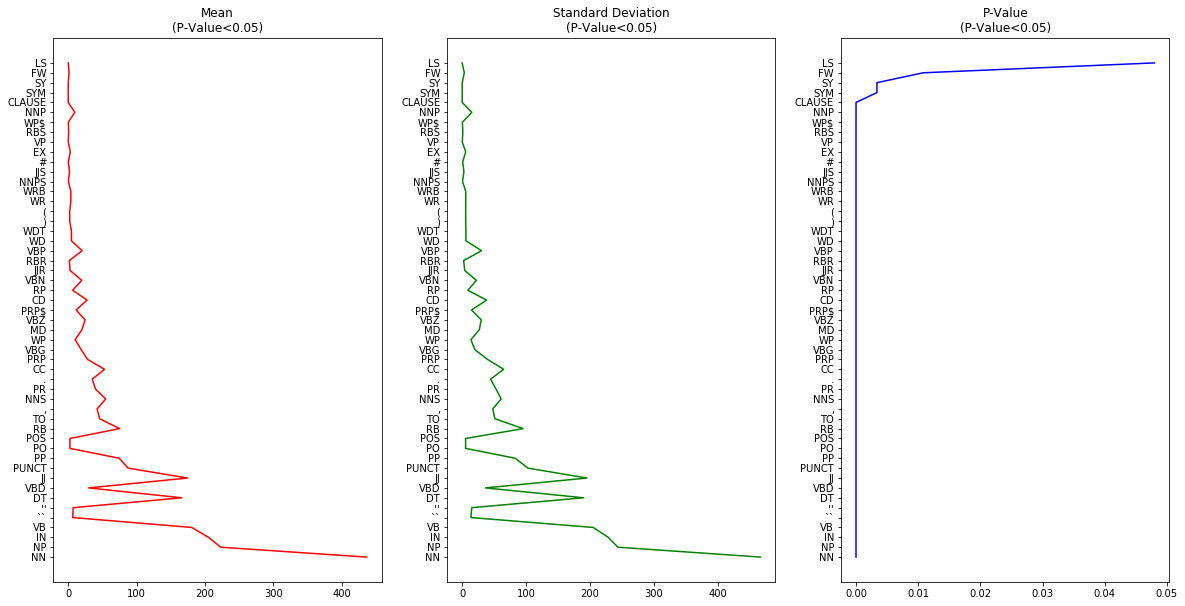

In [0]:
# Import preprocessing library from sklearn
from sklearn.preprocessing import scale

# Retrieve only values with pvalue lower than 0.05
summary_ = summary.loc[:, summary.loc['pvalue', :] < 0.05]

# Scales the values
mean = summary_.loc['mean']
sd = summary_.loc['sd']
pvalue = summary_.loc['pvalue']

# Set figure size
plt.figure(figsize=(20,10))

# Plot mean
plt.subplot(131)
plt.plot(mean, summary_.columns, 'r-')
plt.title('Mean\n(P-Value<0.05)')

# Plot variance
plt.subplot(132)
plt.plot(sd, summary_.columns, 'g-')
plt.title('Standard Deviation\n(P-Value<0.05)')

# Plot pvalue
plt.subplot(133)
plt.plot(pvalue, summary_.columns, 'b-')
plt.title('P-Value\n(P-Value<0.05)')

# Plot figure
plt.show()

In [0]:
# Extract the worst chunks: the ones with p-value higher than 0.05
summary.loc[:, summary.loc['pvalue', :] >= 0.05]

,PDT,PD,:,$,UH,S
mean,0.643697,0.643697,4.850010,0.827728,0.328863,1.0
sd,1.288702,1.288702,11.856110,4.752143,1.374094,0.0
chi2,3.296142,3.296142,0.369941,0.231516,0.039282,0.0
pvalue,0.069443,0.069443,0.543036,0.630402,0.842890,1.0


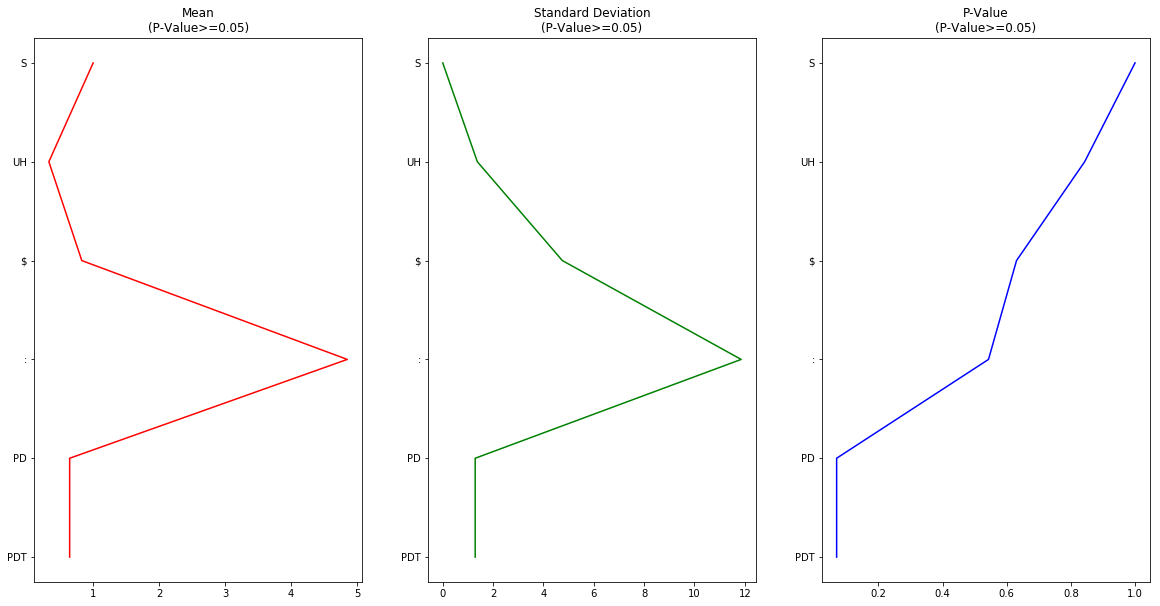

In [0]:
# Import preprocessing library from sklearn
from sklearn.preprocessing import scale

# Retrieve only values with pvalue lower than 0.05
summary_ = summary.loc[:, summary.loc['pvalue', :] >= 0.05]

# Scales the values
mean = summary_.loc['mean']
sd = summary_.loc['sd']
pvalue = summary_.loc['pvalue']

# Set figure size
plt.figure(figsize=(20,10))

# Plot mean
plt.subplot(131)
plt.plot(mean, summary_.columns, 'r-')
plt.title('Mean\n(P-Value>=0.05)')

# Plot variance
plt.subplot(132)
plt.plot(sd, summary_.columns, 'g-')
plt.title('Standard Deviation\n(P-Value>=0.05)')

# Plot pvalue
plt.subplot(133)
plt.plot(pvalue, summary_.columns, 'b-')
plt.title('P-Value\n(P-Value>=0.05)')

# Plot figure
plt.show()

# 5. Classifiers
Finding the best outcome

Since each classificator (and even every vectorizer) has its own parameters, it would be hard for one to test manually every possible combination of those parameters. To solve this problem, sklearn library provides GridSearchCV.

GridSearchCV provides the same methods as a normal sklearn's Machine Learning algroithm and gets used in the same way, however it is not a proper ML algorithm. It Takes as input a ML algorithm (or a pipeline) and some parameters, and tests the former with every combination of the latter. Like any ML algorithm it returns a score: the better according to every parameter combination.

It uses cross-validation on a user-defined k-fold, 3-fold by default.


In [41]:
# Import dependencies
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report

# Defines a function which takes as input a Machine Learning algorithm, a training and a testing dataset
# Trains the ML algorithm on the given training set
# Tests the ML algorithm on the given testing set
# As result, computes a Confusion Martix and relative scores
# Returns trained ML algorithm
def train_test(ml, X_train, Y_train, X_test, Y_test):
    # Fits ml algorithm on training set
    ml.fit(X_train, Y_train)
    # Predicts Y on Xtest
    Y_predict = ml.predict(X_test)
    # Prints confusion matrix
    print('Confusion matrix:\n{}'.format(metrics.confusion_matrix(Y_test, Y_predict)))
    print()
    # Print classification report
    print('Classification report:\n{}'.format(classification_report(Y_test, Y_predict)))
    print()
    # Prints accuracy
    print('Accuracy: {}'.format(accuracy_score(Y_test, Y_predict)))
    print()
    # returns trained algorithm
    return ml

# Defines a train_test wrapper function for GridSearchCV
# Just adds some optput info
def train_test_gs(gs, X_train, Y_train , X_test, Y_test):
    gs = train_test(gs, X_train, Y_train, X_test, Y_test)
    # Prints other information (best parameters)
    print('Obtained by GridSearchCV with the following parameters:')
    for pname in gs.best_params_:
         print(" - %s: %r" % (pname, gs.best_params_[pname]))
    # Returns trained ML algorithm
    return gs

## 5.6 Tree

In [188]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.pipeline import Pipeline, FeatureUnion

In [189]:
# Bag of words
bow = Pipeline([
    ('vect', CountVectorizer(max_df=0.2, ngram_range=(1,2))),
    ('tfidf', TfidfTransformer(use_idf=True)),
    ('kbst', SelectKBest(k=1700))
])

### 5.6.1 Liar Liar dataset

In [190]:
# Part of speech
pos = Pipeline([
    ('vect', CountVectorizer(tokenizer=chunk_tokenizer)),
    ('chi2', SelectKBest(chi2, k=25))
])

**BOW**

In [191]:
features = FeatureUnion([
    ('bow', bow)
])

pl = Pipeline([
    ('features', features),
    ('clf', DecisionTreeClassifier(random_state=0))
])

test = train_test(pl, X_train_liar, Y_train_liar, X_test_liar, Y_test_liar)

Confusion matrix:
[[141 108]
 [ 98 110]]

Classification report:
             precision    recall  f1-score   support

          0       0.59      0.57      0.58       249
          1       0.50      0.53      0.52       208

avg / total       0.55      0.55      0.55       457


Accuracy: 0.5492341356673961



**POS**

In [192]:
features = FeatureUnion([
    ('pos', pos)
])

pl = Pipeline([
    ('features', features),
    ('clf', DecisionTreeClassifier(random_state=0))
])

test = train_test(pl, X_train_liar, Y_train_liar, X_test_liar, Y_test_liar)

Confusion matrix:
[[152  97]
 [116  92]]

Classification report:
             precision    recall  f1-score   support

          0       0.57      0.61      0.59       249
          1       0.49      0.44      0.46       208

avg / total       0.53      0.53      0.53       457


Accuracy: 0.5339168490153173



**BOW + POS**

In [193]:
features = FeatureUnion([
    ('bow', bow),
    ('pos', pos)
])

pl = Pipeline([
    ('features', features),
    ('clf', DecisionTreeClassifier(random_state=0))
])

test = train_test(pl, X_train_liar, Y_train_liar, X_test_liar, Y_test_liar)

Confusion matrix:
[[148 101]
 [ 89 119]]

Classification report:
             precision    recall  f1-score   support

          0       0.62      0.59      0.61       249
          1       0.54      0.57      0.56       208

avg / total       0.59      0.58      0.58       457


Accuracy: 0.5842450765864332



### 5.6.2 Fake Or Real dataset

In [196]:
# Part of speech
pos = Pipeline([
    ('vect', CountVectorizer(tokenizer=chunk_tokenizer)),
    ('chi2', SelectKBest(chi2, k=50))
])

**BOW**

In [197]:
features = FeatureUnion([
    ('bow', bow)
])

pl = Pipeline([
    ('features', features),
    ('clf', DecisionTreeClassifier(random_state=0))
])

test = train_test(pl, X_train_fake_or_real, Y_train_fake_or_real, X_test_fake_or_real, Y_test_fake_or_real)

Confusion matrix:
[[483 136]
 [123 470]]

Classification report:
             precision    recall  f1-score   support

          0       0.80      0.78      0.79       619
          1       0.78      0.79      0.78       593

avg / total       0.79      0.79      0.79      1212


Accuracy: 0.7863036303630363



**POS**

In [198]:
features = FeatureUnion([
    ('pos', pos)
])

pl = Pipeline([
    ('features', features),
    ('clf', DecisionTreeClassifier(random_state=0))
])

test = train_test(pl, X_train_fake_or_real, Y_train_fake_or_real, X_test_fake_or_real, Y_test_fake_or_real)

Confusion matrix:
[[458 161]
 [169 424]]

Classification report:
             precision    recall  f1-score   support

          0       0.73      0.74      0.74       619
          1       0.72      0.72      0.72       593

avg / total       0.73      0.73      0.73      1212


Accuracy: 0.7277227722772277



**BOW + POS**

In [199]:
features = FeatureUnion([
    ('bow', bow),
    ('pos', pos)
])

pl = Pipeline([
    ('features', features),
    ('clf', DecisionTreeClassifier(random_state=0))
])

test = train_test(pl, X_train_fake_or_real, Y_train_fake_or_real, X_test_fake_or_real, Y_test_fake_or_real)

Confusion matrix:
[[507 112]
 [110 483]]

Classification report:
             precision    recall  f1-score   support

          0       0.82      0.82      0.82       619
          1       0.81      0.81      0.81       593

avg / total       0.82      0.82      0.82      1212


Accuracy: 0.8168316831683168



## 5.7 Logistic Regression

In [44]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression

### 5.7.1 Liar Liar dataset

#### BOW

In [215]:
bow = Pipeline([
    ('vect', CountVectorizer(max_df=0.2, ngram_range=(1,2))),
    ('tfidf', TfidfTransformer(use_idf=True))
])

In [216]:
features = FeatureUnion([
    ('bow', bow)
])

pl = Pipeline([
    ('features', features),
    ('clf', LogisticRegression(random_state=0))
])

test = train_test(pl, X_train_liar, Y_train_liar, X_test_liar, Y_test_liar)

Confusion matrix:
[[190  59]
 [110  98]]

Classification report:
             precision    recall  f1-score   support

          0       0.63      0.76      0.69       249
          1       0.62      0.47      0.54       208

avg / total       0.63      0.63      0.62       457


Accuracy: 0.6301969365426696



**POS**

In [217]:
pos = Pipeline([
    ('vect', CountVectorizer(tokenizer=chunk_tokenizer)),
    ('chi2', SelectKBest(chi2, k=25))
])

In [218]:
# BOW + POS
features = FeatureUnion([
    ('pos', pos)
])

pl = Pipeline([
    ('features', features),
    ('clf', LogisticRegression(random_state=0))
])

test = train_test(pl, X_train_liar, Y_train_liar, X_test_liar, Y_test_liar)

Confusion matrix:
[[194  55]
 [128  80]]

Classification report:
             precision    recall  f1-score   support

          0       0.60      0.78      0.68       249
          1       0.59      0.38      0.47       208

avg / total       0.60      0.60      0.58       457


Accuracy: 0.5995623632385121



**BOW + POS**

In [219]:
features = FeatureUnion([
    ('bow', bow),
    ('pos', pos)
])

pl = Pipeline([
    ('features', features),
    ('clf', LogisticRegression(random_state=0))
])

test = train_test(pl, X_train_liar, Y_train_liar, X_test_liar, Y_test_liar)

Confusion matrix:
[[188  61]
 [103 105]]

Classification report:
             precision    recall  f1-score   support

          0       0.65      0.76      0.70       249
          1       0.63      0.50      0.56       208

avg / total       0.64      0.64      0.63       457


Accuracy: 0.6411378555798687



### 5.7.2 Fake Or Real dataset

**BOW**

In [45]:
bow = Pipeline([
    ('cv', CountVectorizer(max_df=0.2,ngram_range=(1,2))),
    ('tfidf', TfidfTransformer(use_idf=True))
])

In [46]:
# BOW
features = FeatureUnion([
    ('bow', bow)
])

pl = Pipeline([
    ('features', features),
    ('clf', LogisticRegression(random_state=0))
])

test = train_test(pl, X_train_fake_or_real, Y_train_fake_or_real, X_test_fake_or_real, Y_test_fake_or_real)

Confusion matrix:
[[576  43]
 [ 62 531]]

Classification report:
             precision    recall  f1-score   support

          0       0.90      0.93      0.92       619
          1       0.93      0.90      0.91       593

avg / total       0.91      0.91      0.91      1212


Accuracy: 0.9133663366336634



**POS**

In [47]:
# Define POS pipeline
pos = Pipeline([
    ('vect', CountVectorizer(tokenizer=chunk_tokenizer)),
    ('chi2', SelectKBest(chi2, k=50))
])

In [48]:
features = FeatureUnion([
    ('pos', pos)
])

pl = Pipeline([
    ('features', features),
    ('clf', LogisticRegression(random_state=0))
])

test = train_test(pl, X_train_fake_or_real, Y_train_fake_or_real, X_test_fake_or_real, Y_test_fake_or_real)

Confusion matrix:
[[535  84]
 [156 437]]

Classification report:
             precision    recall  f1-score   support

          0       0.77      0.86      0.82       619
          1       0.84      0.74      0.78       593

avg / total       0.81      0.80      0.80      1212


Accuracy: 0.801980198019802



**BOW + POS**

In [49]:
# BOW + POS
features = FeatureUnion([
    ('pos', pos),
    ('bow', bow)
])

pl = Pipeline([
    ('features', features),
    ('clf', LogisticRegression(random_state=0))
])

test = train_test(pl, X_train_fake_or_real, Y_train_fake_or_real, X_test_fake_or_real, Y_test_fake_or_real)

Confusion matrix:
[[577  42]
 [ 90 503]]

Classification report:
             precision    recall  f1-score   support

          0       0.87      0.93      0.90       619
          1       0.92      0.85      0.88       593

avg / total       0.89      0.89      0.89      1212


Accuracy: 0.8910891089108911



## 5.8 Convolutional Neural Network (CNN)

In [47]:
# CNN is implemented using Tensorflow from Google
import tensorflow as tf
from tensorflow import keras

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### 5.8.1 Liar Liar dataset

**BOW**

In [91]:
# Define train dataset
X_train, Y_train = X_train_liar.copy(), Y_train_liar.copy()
# Define test dataset
X_test, Y_test = X_test_liar.copy(), Y_test_liar.copy()

In [92]:
# Compute Bag of Words
from sklearn.feature_extraction.text import CountVectorizer

# Bag of Words with ngrams from 1 to 3
cv = CountVectorizer(ngram_range=(1,1)).fit(X_train, Y_train)
X_train = cv.transform(X_train)
X_test = cv.transform(X_test)

In [93]:
# Select only the best outcome since we can't check all word embeddings

# Select best 1000 word embeddings
kbst = SelectKBest(score_func=chi2, k=200).fit(X_train, Y_train)
X_train = kbst.transform(X_train)
X_test = kbst.transform(X_test)

In [94]:
# Define a validation set
from sklearn.model_selection import train_test_split

X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.2, random_state=0)

In [95]:
# Build the model
model = keras.Sequential()
model.add(keras.layers.Embedding(X_train.shape[0] + 1, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

# Shows model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 16)          46864     
_________________________________________________________________
global_average_pooling1d_4 ( (None, 16)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 17        
Total params: 47,153
Trainable params: 47,153
Non-trainable params: 0
_________________________________________________________________


In [96]:
# Define loss function and optimizer
model.compile(
    optimizer=tf.train.AdamOptimizer(),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [97]:
# Train the model
history = model.fit(
    X_train,
    Y_train,
    epochs=40,
    batch_size=512,
    validation_data=(X_valid, Y_valid),
    verbose=1
)

# Evaluate the model
print(model.evaluate(X_test, Y_test))

Train on 2928 samples, validate on 733 samples
Epoch 1/40
2928/2928 [==============================] - 1s 408us/step - loss: 0.6918 - acc: 0.5362 - val_loss: 0.6893 - val_acc: 0.5689
Epoch 2/40
2928/2928 [==============================] - 0s 57us/step - loss: 0.6913 - acc: 0.5362 - val_loss: 0.6880 - val_acc: 0.5689
Epoch 3/40
2928/2928 [==============================] - 0s 59us/step - loss: 0.6909 - acc: 0.5362 - val_loss: 0.6869 - val_acc: 0.5689
Epoch 4/40
2928/2928 [==============================] - 0s 67us/step - loss: 0.6905 - acc: 0.5362 - val_loss: 0.6863 - val_acc: 0.5689
Epoch 5/40
2928/2928 [==============================] - 0s 58us/step - loss: 0.6905 - acc: 0.5362 - val_loss: 0.6859 - val_acc: 0.5689
Epoch 6/40
2928/2928 [==============================] - 0s 67us/step - loss: 0.6905 - acc: 0.5362 - val_loss: 0.6856 - val_acc: 0.5689
Epoch 7/40
2928/2928 [==============================] - 0s 68us/step - loss: 0.6905 - acc: 0.5362 - val_loss: 0.6854 - val_acc: 0.5689
Epoch 8

#### POS

In [104]:
# Define train dataset
X_train, Y_train = X_train_liar.copy(), Y_train_liar.copy()
# Define test dataset
X_test, Y_test = X_test_liar.copy(), Y_test_liar.copy()

In [105]:
# Import resources
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import SelectKBest, chi2

# Part of speech
pos = Pipeline([
    ('cv', CountVectorizer(tokenizer=chunk_tokenizer)),
    ('kbst', SelectKBest(k=25, score_func=chi2))
])

# Transform dataset
pos.fit(X_train, Y_train)
X_train = pos.transform(X_train)
X_test = pos.transform(X_test)

In [106]:
# Define a validation set
from sklearn.model_selection import train_test_split

X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.2, random_state=0)

In [107]:
# Build the model
model = keras.Sequential()
model.add(keras.layers.Embedding(X_train.shape[0] + 1, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

# Shows model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 16)          46864     
_________________________________________________________________
global_average_pooling1d_6 ( (None, 16)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 17        
Total params: 47,153
Trainable params: 47,153
Non-trainable params: 0
_________________________________________________________________


In [108]:
# Define loss function and optimizer
model.compile(
    optimizer=tf.train.AdamOptimizer(),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [109]:
# Train the model
history = model.fit(
    X_train,
    Y_train,
    epochs=40,
    batch_size=512,
    validation_data=(X_valid, Y_valid),
    verbose=1
)

# Evaluate the model
print(model.evaluate(X_test, Y_test))

Train on 2928 samples, validate on 733 samples
Epoch 1/40
2928/2928 [==============================] - 1s 490us/step - loss: 0.6928 - acc: 0.5154 - val_loss: 0.6907 - val_acc: 0.5689
Epoch 2/40
2928/2928 [==============================] - 0s 17us/step - loss: 0.6913 - acc: 0.5362 - val_loss: 0.6887 - val_acc: 0.5689
Epoch 3/40
2928/2928 [==============================] - 0s 18us/step - loss: 0.6905 - acc: 0.5362 - val_loss: 0.6869 - val_acc: 0.5689
Epoch 4/40
2928/2928 [==============================] - 0s 19us/step - loss: 0.6900 - acc: 0.5362 - val_loss: 0.6857 - val_acc: 0.5689
Epoch 5/40
2928/2928 [==============================] - 0s 21us/step - loss: 0.6897 - acc: 0.5362 - val_loss: 0.6847 - val_acc: 0.5689
Epoch 6/40
2928/2928 [==============================] - 0s 20us/step - loss: 0.6894 - acc: 0.5362 - val_loss: 0.6843 - val_acc: 0.5689
Epoch 7/40
2928/2928 [==============================] - 0s 19us/step - loss: 0.6892 - acc: 0.5362 - val_loss: 0.6841 - val_acc: 0.5689
Epoch 8

**BOW + POS**

In [48]:
# Define train dataset
X_train, Y_train = X_train_liar.copy(), Y_train_liar.copy()
# Define test dataset
X_test, Y_test = X_test_liar.copy(), Y_test_liar.copy()

In [49]:
# Import resources
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import SelectKBest, chi2

# Bag of words
bow = Pipeline([
    ('cv', CountVectorizer()),
    ('kbst', SelectKBest(score_func=chi2, k=200))
])

# Part of speech
pos = Pipeline([
    ('cv', CountVectorizer(tokenizer=chunk_tokenizer)),
    ('kbst', SelectKBest(k=25, score_func=chi2))
])

# Pipeline
pl = FeatureUnion([
    ('pos', pos),
    ('bow', bow)
])

# Transform dataset
pl.fit(X_train, Y_train)
X_train = pl.transform(X_train)
X_test = pl.transform(X_test)

In [50]:
# Define a validation set
from sklearn.model_selection import train_test_split

X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.2, random_state=0)

In [51]:
# Build the model
model = keras.Sequential()
model.add(keras.layers.Embedding(X_train.shape[0] + 1, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

# Shows model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          46864     
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 47,153
Trainable params: 47,153
Non-trainable params: 0
_________________________________________________________________


In [52]:
# Define loss function and optimizer
model.compile(
    optimizer=tf.train.AdamOptimizer(),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [53]:
# Train the model
history = model.fit(
    X_train,
    Y_train,
    epochs=40,
    batch_size=512,
    validation_data=(X_valid, Y_valid),
    verbose=1
)

# Evaluate the model
print(model.evaluate(X_test, Y_test))

Train on 2928 samples, validate on 733 samples
Epoch 1/40
2928/2928 [==============================] - 1s 281us/step - loss: 0.6923 - acc: 0.5362 - val_loss: 0.6897 - val_acc: 0.5689
Epoch 2/40
2928/2928 [==============================] - 0s 52us/step - loss: 0.6914 - acc: 0.5362 - val_loss: 0.6882 - val_acc: 0.5689
Epoch 3/40
2928/2928 [==============================] - 0s 48us/step - loss: 0.6909 - acc: 0.5362 - val_loss: 0.6871 - val_acc: 0.5689
Epoch 4/40
2928/2928 [==============================] - 0s 51us/step - loss: 0.6905 - acc: 0.5362 - val_loss: 0.6864 - val_acc: 0.5689
Epoch 5/40
2928/2928 [==============================] - 0s 60us/step - loss: 0.6904 - acc: 0.5362 - val_loss: 0.6860 - val_acc: 0.5689
Epoch 6/40
2928/2928 [==============================] - 0s 51us/step - loss: 0.6904 - acc: 0.5362 - val_loss: 0.6856 - val_acc: 0.5689
Epoch 7/40
2928/2928 [==============================] - 0s 49us/step - loss: 0.6904 - acc: 0.5362 - val_loss: 0.6854 - val_acc: 0.5689
Epoch 8

### 5.8.2 Fake Or Real

**BOW**

In [119]:
# Define train dataset
X_train, Y_train = X_train_fake_or_real.copy(), Y_train_fake_or_real.copy()
# Define test dataset
X_test, Y_test = X_test_fake_or_real.copy(), Y_test_fake_or_real.copy()

In [120]:
# Import resources
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import SelectKBest, chi2

# Bag of words
pl = Pipeline([
    ('cv', CountVectorizer(ngram_range=(1,3))),
    ('kbst', SelectKBest(k=200, score_func=chi2))
])

# Transform dataset
pl.fit(X_train, Y_train)
X_train = pl.transform(X_train)
X_test = pl.transform(X_test)

In [121]:
# Define a validation set
from sklearn.model_selection import train_test_split

X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.2, random_state=0)

In [122]:
# Build the model
model = keras.Sequential()
model.add(keras.layers.Embedding(X_train.shape[0] + 1, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

# Shows model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, None, 16)          62048     
_________________________________________________________________
global_average_pooling1d_9 ( (None, 16)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 17        
Total params: 62,337
Trainable params: 62,337
Non-trainable params: 0
_________________________________________________________________


In [123]:
# Define loss function and optimizer
model.compile(
    optimizer=tf.train.AdamOptimizer(),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [124]:
# Train the model
history = model.fit(
    X_train,
    Y_train,
    epochs=40,
    batch_size=512,
    validation_data=(X_valid, Y_valid),
    verbose=1
)

# Evaluate the model
print(model.evaluate(X_test, Y_test))

Train on 3877 samples, validate on 970 samples
Epoch 1/40
3877/3877 [==============================] - 2s 479us/step - loss: 0.6933 - acc: 0.5383 - val_loss: 0.6922 - val_acc: 0.5876
Epoch 2/40
3877/3877 [==============================] - 0s 69us/step - loss: 0.6915 - acc: 0.5613 - val_loss: 0.6911 - val_acc: 0.5412
Epoch 3/40
3877/3877 [==============================] - 0s 61us/step - loss: 0.6901 - acc: 0.5834 - val_loss: 0.6899 - val_acc: 0.5856
Epoch 4/40
3877/3877 [==============================] - 0s 70us/step - loss: 0.6887 - acc: 0.6337 - val_loss: 0.6884 - val_acc: 0.6433
Epoch 5/40
3877/3877 [==============================] - 0s 71us/step - loss: 0.6871 - acc: 0.6580 - val_loss: 0.6868 - val_acc: 0.6443
Epoch 6/40
3877/3877 [==============================] - 0s 70us/step - loss: 0.6852 - acc: 0.6670 - val_loss: 0.6847 - val_acc: 0.6753
Epoch 7/40
3877/3877 [==============================] - 0s 68us/step - loss: 0.6827 - acc: 0.6840 - val_loss: 0.6818 - val_acc: 0.6711
Epoch 8

**POS**

In [142]:
# Define train dataset
X_train, Y_train = X_train_fake_or_real.copy(), Y_train_fake_or_real.copy()
# Define test dataset
X_test, Y_test = X_test_fake_or_real.copy(), Y_test_fake_or_real.copy()

In [143]:
# Import resources
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import SelectKBest, chi2

# Part of speech
pos = Pipeline([
    ('cv', CountVectorizer(tokenizer=chunk_tokenizer)),
    ('kbst', SelectKBest(k=50, score_func=chi2))
])

# Transform dataset
pos.fit(X_train, Y_train)
X_train = pos.transform(X_train)
X_test = pos.transform(X_test)

In [144]:
# Define a validation set
from sklearn.model_selection import train_test_split

X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.2, random_state=0)

In [151]:
# Build the model
model = keras.Sequential()
model.add(keras.layers.Embedding(10000, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

# Shows model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_16 (Embedding)     (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_16  (None, 16)                0         
_________________________________________________________________
dense_32 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [152]:
# Define loss function and optimizer
model.compile(
    optimizer=tf.train.AdamOptimizer(),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [153]:
# Train the model
history = model.fit(
    X_train,
    Y_train,
    epochs=40,
    batch_size=512,
    validation_data=(X_valid, Y_valid),
    verbose=1
)

# Evaluate the model
print(model.evaluate(X_test, Y_test))

Train on 3877 samples, validate on 970 samples
Epoch 1/40
3877/3877 [==============================] - 1s 369us/step - loss: 0.6917 - acc: 0.5192 - val_loss: 0.6918 - val_acc: 0.4866
Epoch 2/40
3877/3877 [==============================] - 0s 24us/step - loss: 0.6901 - acc: 0.5110 - val_loss: 0.6910 - val_acc: 0.4856
Epoch 3/40
3877/3877 [==============================] - 0s 23us/step - loss: 0.6883 - acc: 0.5107 - val_loss: 0.6899 - val_acc: 0.4856
Epoch 4/40
3877/3877 [==============================] - 0s 21us/step - loss: 0.6862 - acc: 0.5123 - val_loss: 0.6882 - val_acc: 0.4897
Epoch 5/40
3877/3877 [==============================] - 0s 21us/step - loss: 0.6836 - acc: 0.5262 - val_loss: 0.6861 - val_acc: 0.5000
Epoch 6/40
3877/3877 [==============================] - 0s 28us/step - loss: 0.6807 - acc: 0.5610 - val_loss: 0.6836 - val_acc: 0.5412
Epoch 7/40
3877/3877 [==============================] - 0s 22us/step - loss: 0.6771 - acc: 0.6041 - val_loss: 0.6807 - val_acc: 0.5887
Epoch 8

**BOW + POS**

In [154]:
# Define train dataset
X_train, Y_train = X_train_fake_or_real.copy(), Y_train_fake_or_real.copy()
# Define test dataset
X_test, Y_test = X_test_fake_or_real.copy(), Y_test_fake_or_real.copy()

In [155]:
# Import resources
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import SelectKBest, chi2

bow = Pipeline([
    ('cv', CountVectorizer(ngram_range=(1,3))),
    ('kbst', SelectKBest(k=200, score_func=chi2))
])

pos = Pipeline([
    ('cv', CountVectorizer(tokenizer=chunk_tokenizer)),
    ('kbst', SelectKBest(k=50, score_func=chi2))
])

pl = FeatureUnion([
    ('bow', bow),
    ('pos', pos)
])

# Transform dataset
pl.fit(X_train, Y_train)
X_train = pl.transform(X_train)
X_test = pl.transform(X_test)

In [156]:
# Define a validation set
from sklearn.model_selection import train_test_split

X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.2, random_state=0)

In [160]:
# Build the model
model = keras.Sequential()
model.add(keras.layers.Embedding(10000, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

# Shows model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_18 (Embedding)     (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_18  (None, 16)                0         
_________________________________________________________________
dense_36 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_37 (Dense)             (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [161]:
# Define loss function and optimizer
model.compile(
    optimizer=tf.train.AdamOptimizer(),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [162]:
# Train the model
history = model.fit(
    X_train,
    Y_train,
    epochs=40,
    batch_size=512,
    validation_data=(X_valid, Y_valid),
    verbose=1
)

# Evaluate the model
print(model.evaluate(X_test, Y_test))

Train on 3877 samples, validate on 970 samples
Epoch 1/40
3877/3877 [==============================] - 2s 466us/step - loss: 0.6921 - acc: 0.5138 - val_loss: 0.6919 - val_acc: 0.5031
Epoch 2/40
3877/3877 [==============================] - 0s 63us/step - loss: 0.6910 - acc: 0.5344 - val_loss: 0.6907 - val_acc: 0.5464
Epoch 3/40
3877/3877 [==============================] - 0s 65us/step - loss: 0.6894 - acc: 0.5912 - val_loss: 0.6890 - val_acc: 0.6000
Epoch 4/40
3877/3877 [==============================] - 0s 62us/step - loss: 0.6876 - acc: 0.6309 - val_loss: 0.6873 - val_acc: 0.6216
Epoch 5/40
3877/3877 [==============================] - 0s 63us/step - loss: 0.6855 - acc: 0.6526 - val_loss: 0.6852 - val_acc: 0.6485
Epoch 6/40
3877/3877 [==============================] - 0s 69us/step - loss: 0.6831 - acc: 0.6755 - val_loss: 0.6827 - val_acc: 0.6567
Epoch 7/40
3877/3877 [==============================] - 0s 66us/step - loss: 0.6802 - acc: 0.6848 - val_loss: 0.6795 - val_acc: 0.6742
Epoch 8